In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PySulfSat as ss
import Thermobar as pt
pd.options.display.max_columns = None
import math

In [2]:
#Liqs=ss.import_data('Clean_Oneill_SCSSCalc_July2020_Fixed_Sulfide.xlsx', sheet_name="Python_Input")
Liq=pd.read_excel('PySulfSat_Input.xlsx', sheet_name="Sheet1")

In [3]:
logfo2=Liq['logfO2']
P_kbar=Liq['P(bar)']/1000
T_K=Liq['T(deg C)']+273
FeFeNiCu=Liq['Fe/(Fe+Cu+Ni)']
H2O_Liq=Liq['H2O(wt%)']

## How it was supposed to be used

In [4]:
CalcS=ss.calculate_Li_Zhang_2022_SCSS(df=Liq, T_K=T_K, P_kbar=P_kbar, 
H2O_Liq=H2O_Liq, Fe_FeNiCu_Sulf=FeFeNiCu, logfo2=logfo2)
CalcS.head()

,SCSS_Tot,Fe_FeNiCu_Sulf,Fe3Fet_Liq,Sample No.,P(bar),T(deg C),ΔFMQ,logfO2,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,Fe/(Fe+Cu+Ni),H2O(wt%),S total cal,ln(XFe2O3/XFeO),FeO,Fe2O3,delt G/RT,∑XM*AM,lnCs,-lnXFeO,-lnrFeO,lnaFeS,(C1P+C2erf(P))/T,Unnamed: 28,ln [S],S2- cal,Unnamed: 31,XH2Ot,lnXH2Ot,K(OH),XOH,lnXOH,XH2Om,lnXH2Om,ln(XOH+XH2O),Unnamed: 40,1/T,lnCHS cal,HS cal,Unnamed: 44,Na+K-Al term,lnCHS cal+NKA term,HS cal2,H2O_Liq
0,1040.393531,0.999559,0.058066,FeS,10000.0,1250,-2.0,-9.243243,51.28,0.89,17.13,7.13,NaN,7.19,10.69,2.58,0.83,NaN,0.999559,0.0,1040.411979,-3.479508,0.060258,0.001857,7.325,3.889870,-2.829296,2.940856,-0.437624,-0.054708,0.003144,NaN,6.947372,1040.411979,NaN,0.0,NaN,0.886857,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.794780,NaN,NaN,0.0
1,1029.243979,0.928749,0.056183,Fe90,10000.0,1250,-2.0,-9.243243,50.99,0.71,16.85,8.51,NaN,7.08,10.35,2.51,0.84,NaN,0.928749,0.0,1029.266333,-3.514465,0.072085,0.002146,7.325,4.125599,-2.593567,2.759551,-0.418196,-0.139330,0.003144,NaN,6.936602,1029.266333,NaN,0.0,NaN,0.887207,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.747418,NaN,NaN,0.0
2,829.070902,0.788135,0.057885,Fe80,10000.0,1250,-2.0,-9.243243,49.60,1.11,17.33,6.88,NaN,7.23,10.57,2.53,0.80,NaN,0.788135,0.0,829.086253,-3.482819,0.059264,0.001821,7.325,3.889202,-2.829965,2.960316,-0.446893,-0.291279,0.003144,NaN,6.720324,829.086253,NaN,0.0,NaN,0.888682,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.959659,NaN,NaN,0.0
3,802.005890,0.800000,0.058735,Fe80-24h,10000.0,1250,-2.0,-9.243243,50.34,1.09,17.29,5.92,NaN,7.21,10.51,2.54,0.80,NaN,0.800000,0.0,802.017741,-3.467341,0.051053,0.001593,7.325,3.686250,-3.032916,3.109590,-0.448898,-0.268789,0.003144,NaN,6.687131,802.017741,NaN,0.0,NaN,0.886915,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.948885,NaN,NaN,0.0
4,822.749200,0.800000,0.057695,Fe80-3h,10000.0,1250,-2.0,-9.243243,52.68,1.09,16.88,6.95,NaN,7.41,10.52,2.53,0.81,NaN,0.800000,0.0,822.763945,-3.486304,0.057929,0.001773,7.325,3.810002,-2.909164,2.976590,-0.407446,-0.275455,0.003144,NaN,6.712669,822.763945,NaN,0.0,NaN,0.885100,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.707963,NaN,NaN,0.0


## Using it with specific Fe3Fet_Liq ratio instead

In [5]:
import Thermobar as pt
Liq['Sample_ID_Liq']='test'
df=pt.convert_fo2_to_fe_partition(liq_comps=Liq, T_K=T_K,
                            P_kbar=P_kbar, fo2=10**logfo2, 
                               model="Kress1991", renorm=True)
df['Fe3Fet_Liq'].head()

g:\my drive\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\core.py:4108: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Old_Sum=(100/liq_comps_c.drop(['Sample_ID_Liq'], axis=1).sum(axis=1))


0    0.058034
1    0.056152
2    0.057853
3    0.058703
4    0.057664
Name: Fe3Fet_Liq, dtype: float64

In [8]:
CalcS_Fe3=ss.calculate_Li_Zhang_2022_SCSS(df=Liq, T_K=T_K, P_kbar=P_kbar, 
H2O_Liq=H2O_Liq, Fe_FeNiCu_Sulf=FeFeNiCu, Fe3Fet_Liq=df['Fe3Fet_Liq'])
CalcS_Fe3.head()

,SCSS_Tot,Fe_FeNiCu_Sulf,Fe3Fet_Liq,Sample No.,P(bar),T(deg C),ΔFMQ,logfO2,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,Fe/(Fe+Cu+Ni),H2O(wt%),S total cal,ln(XFe2O3/XFeO),FeO,Fe2O3,delt G/RT,∑XM*AM,lnCs,-lnXFeO,-lnrFeO,lnaFeS,(C1P+C2erf(P))/T,Unnamed: 28,ln [S],S2- cal,Unnamed: 31,XH2Ot,lnXH2Ot,K(OH),XOH,lnXOH,XH2Om,lnXH2Om,ln(XOH+XH2O),Unnamed: 40,1/T,lnCHS cal,HS cal,Unnamed: 44,Na+K-Al term,lnCHS cal+NKA term,HS cal2,Sample_ID_Liq,H2O_Liq
0,1040.409682,0.999559,0.058034,FeS,10000.0,1250,-2.0,-9.243243,51.28,0.89,17.13,7.13,NaN,7.19,10.69,2.58,0.83,NaN,0.999559,0.0,1040.411979,-3.479508,0.060258,0.001857,7.325,3.889870,-2.829296,2.940856,-0.437624,-0.054708,0.003144,NaN,6.947372,1040.411979,NaN,0.0,NaN,0.886857,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.794780,NaN,NaN,test,0.0
1,1029.267295,0.928749,0.056152,Fe90,10000.0,1250,-2.0,-9.243243,50.99,0.71,16.85,8.51,NaN,7.08,10.35,2.51,0.84,NaN,0.928749,0.0,1029.266333,-3.514465,0.072085,0.002146,7.325,4.125599,-2.593567,2.759551,-0.418196,-0.139330,0.003144,NaN,6.936602,1029.266333,NaN,0.0,NaN,0.887207,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.747418,NaN,NaN,test,0.0
2,829.082903,0.788135,0.057853,Fe80,10000.0,1250,-2.0,-9.243243,49.60,1.11,17.33,6.88,NaN,7.23,10.57,2.53,0.80,NaN,0.788135,0.0,829.086253,-3.482819,0.059264,0.001821,7.325,3.889202,-2.829965,2.960316,-0.446893,-0.291279,0.003144,NaN,6.720324,829.086253,NaN,0.0,NaN,0.888682,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.959659,NaN,NaN,test,0.0
3,802.012981,0.800000,0.058703,Fe80-24h,10000.0,1250,-2.0,-9.243243,50.34,1.09,17.29,5.92,NaN,7.21,10.51,2.54,0.80,NaN,0.800000,0.0,802.017741,-3.467341,0.051053,0.001593,7.325,3.686250,-3.032916,3.109590,-0.448898,-0.268789,0.003144,NaN,6.687131,802.017741,NaN,0.0,NaN,0.886915,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.948885,NaN,NaN,test,0.0
4,822.760655,0.800000,0.057664,Fe80-3h,10000.0,1250,-2.0,-9.243243,52.68,1.09,16.88,6.95,NaN,7.41,10.52,2.53,0.81,NaN,0.800000,0.0,822.763945,-3.486304,0.057929,0.001773,7.325,3.810002,-2.909164,2.976590,-0.407446,-0.275455,0.003144,NaN,6.712669,822.763945,NaN,0.0,NaN,0.885100,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.707963,NaN,NaN,test,0.0


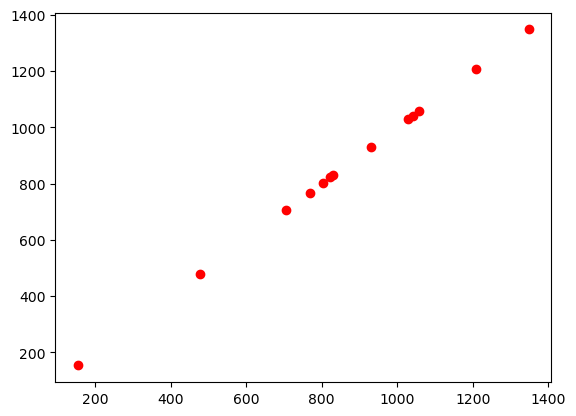

In [9]:
plt.plot(CalcS_Fe3['SCSS_Tot'], CalcS['SCSS_Tot'], 'or')

## Using it with Oneill sulfide composition

In [4]:
Ni_Liq=Liq['logfO2']*0+500
Cu_Liq=Liq['logfO2']*0+100

CalcS_Oneill=ss.calculate_Li_Zhang_2022_SCSS(df=Liq, T_K=T_K, P_kbar=P_kbar, 
H2O_Liq=H2O_Liq, Fe_FeNiCu_Sulf="Calc_ONeill", logfo2=logfo2, Ni_Liq=Ni_Liq, Cu_Liq=Cu_Liq)

<class 'pandas.core.series.Series'>
0     0.427335
1     0.471579
2     0.418670
3     0.382389
4     0.421185
        ...   
63    0.177021
64    0.178988
65    0.179474
66    0.180382
67    0.181209
Length: 68, dtype: float64


In [5]:
CalcS_Oneill.to_clipboard(excel=True)

In [6]:
Liq.to_clipboard(excel=True)

In [7]:
Ni_Liq=Liq['logfO2']*0+500
Cu_Liq=Liq['logfO2']*0+100

CalcS_Smythe=ss.calculate_Li_Zhang_2022_SCSS(df=Liq, T_K=T_K, P_kbar=P_kbar, 
H2O_Liq=H2O_Liq, Fe_FeNiCu_Sulf="Calc_Smythe", logfo2=logfo2, Ni_Liq=Ni_Liq, Cu_Liq=Cu_Liq)

<class 'pandas.core.series.Series'>
0     0.273907
1     0.327225
2     0.263623
3     0.222868
4     0.266591
        ...   
63    0.157833
64    0.157849
65    0.157854
66    0.157861
67    0.157869
Length: 68, dtype: float64


g:\my drive\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\core.py:4108: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Old_Sum=(100/liq_comps_c.drop(['Sample_ID_Liq'], axis=1).sum(axis=1))


0    0.058034
1    0.056152
2    0.057853
3    0.058703
4    0.057664
Name: Fe3Fet_Liq, dtype: float64

In [ ]:
## Using with a set Fe3Fet_Liq insteado f fo2

In [9]:
df['ln_XFe2FeO3_XFeO']

0    -3.479531
1    -3.514488
2    -3.482842
3    -3.467364
4    -3.486326
        ...   
63   -2.805554
64   -2.937725
65   -2.972790
66   -3.041176
67   -3.107142
Name: ln_XFe2FeO3_XFeO, Length: 68, dtype: float64

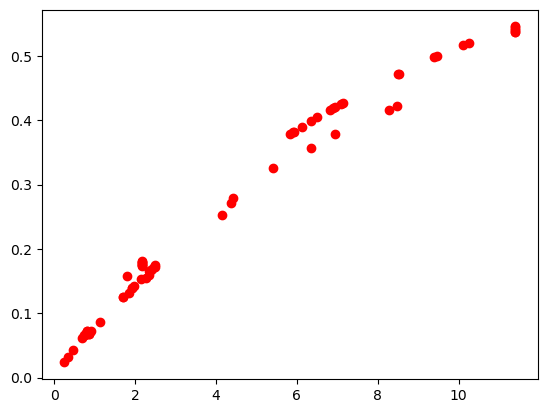

In [10]:
plt.plot(CalcS_Oneill['FeOt_Liq'], CalcS_Oneill['Fe_FeNiCu_Sulf'], 'or')


## Using it exactly as intended - with logfo2, fixed sulfide composition

replaced
<class 'pandas.core.series.Series'>
0     0.999559
1     0.928749
2     0.788135
3     0.800000
4     0.800000
        ...   
63    1.000000
64    1.000000
65    1.000000
66    1.000000
67    1.000000
Name: Fe/(Fe+Cu+Ni), Length: 68, dtype: float64


In [13]:
CalcS.head()

,SCSS_Tot,Fe_FeNiCu_Sulf,Fe3Fet_Liq,Sample No.,P(bar),T(deg C),ΔFMQ,logfO2,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,Fe/(Fe+Cu+Ni),H2O(wt%),S total cal,ln(XFe2O3/XFeO),FeO,Fe2O3,delt G/RT,∑XM*AM,lnCs,-lnXFeO,-lnrFeO,lnaFeS,(C1P+C2erf(P))/T,Unnamed: 28,ln [S],S2- cal,Unnamed: 31,XH2Ot,lnXH2Ot,K(OH),XOH,lnXOH,XH2Om,lnXH2Om,ln(XOH+XH2O),Unnamed: 40,1/T,lnCHS cal,HS cal,Unnamed: 44,Na+K-Al term,lnCHS cal+NKA term,HS cal2,Sample_ID_Liq,H2O_Liq
0,1040.393531,0.999559,0.058066,FeS,10000.0,1250,-2.0,-9.243243,51.28,0.89,17.13,7.13,NaN,7.19,10.69,2.58,0.83,NaN,0.999559,0.0,1040.411979,-3.479508,0.060258,0.001857,7.325,3.889870,-2.829296,2.940856,-0.437624,-0.054708,0.003144,NaN,6.947372,1040.411979,NaN,0.0,NaN,0.886857,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.794780,NaN,NaN,test,0.0
1,1029.243979,0.928749,0.056183,Fe90,10000.0,1250,-2.0,-9.243243,50.99,0.71,16.85,8.51,NaN,7.08,10.35,2.51,0.84,NaN,0.928749,0.0,1029.266333,-3.514465,0.072085,0.002146,7.325,4.125599,-2.593567,2.759551,-0.418196,-0.139330,0.003144,NaN,6.936602,1029.266333,NaN,0.0,NaN,0.887207,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.747418,NaN,NaN,test,0.0
2,829.070902,0.788135,0.057885,Fe80,10000.0,1250,-2.0,-9.243243,49.60,1.11,17.33,6.88,NaN,7.23,10.57,2.53,0.80,NaN,0.788135,0.0,829.086253,-3.482819,0.059264,0.001821,7.325,3.889202,-2.829965,2.960316,-0.446893,-0.291279,0.003144,NaN,6.720324,829.086253,NaN,0.0,NaN,0.888682,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.959659,NaN,NaN,test,0.0
3,802.005890,0.800000,0.058735,Fe80-24h,10000.0,1250,-2.0,-9.243243,50.34,1.09,17.29,5.92,NaN,7.21,10.51,2.54,0.80,NaN,0.800000,0.0,802.017741,-3.467341,0.051053,0.001593,7.325,3.686250,-3.032916,3.109590,-0.448898,-0.268789,0.003144,NaN,6.687131,802.017741,NaN,0.0,NaN,0.886915,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.948885,NaN,NaN,test,0.0
4,822.749200,0.800000,0.057695,Fe80-3h,10000.0,1250,-2.0,-9.243243,52.68,1.09,16.88,6.95,NaN,7.41,10.52,2.53,0.81,NaN,0.800000,0.0,822.763945,-3.486304,0.057929,0.001773,7.325,3.810002,-2.909164,2.976590,-0.407446,-0.275455,0.003144,NaN,6.712669,822.763945,NaN,0.0,NaN,0.885100,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.707963,NaN,NaN,test,0.0


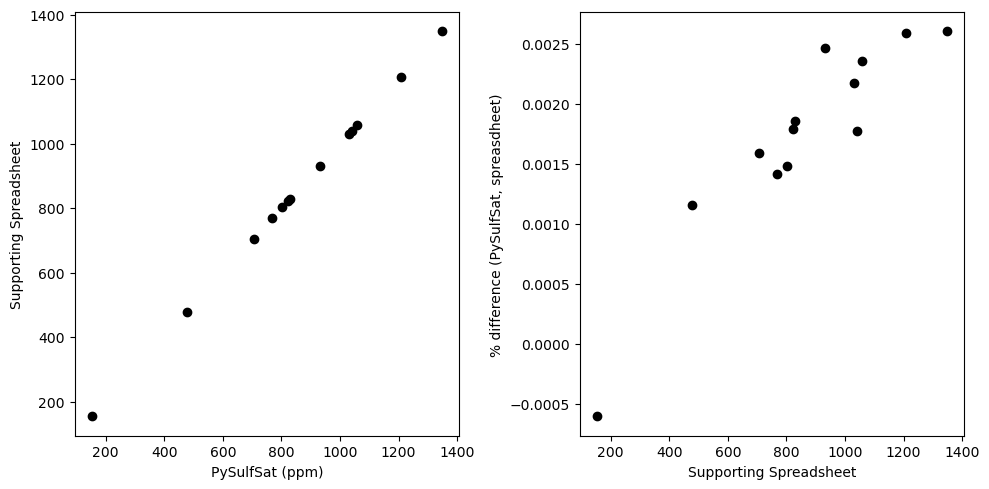

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(CalcS['SCSS_Tot'], Liq['S total cal'], 'ok')
ax2.plot(Liq['S total cal'], 100-100*CalcS['SCSS_Tot']/Liq['S total cal'],  'ok')
ax1.set_xlabel('PySulfSat (ppm)')
ax1.set_ylabel('Supporting Spreadsheet')
ax2.set_ylabel('% difference (PySulfSat, spreasdheet)')
ax2.set_xlabel('Supporting Spreadsheet')
ax2.ticklabel_format(useOffset=False)
fig.tight_layout()

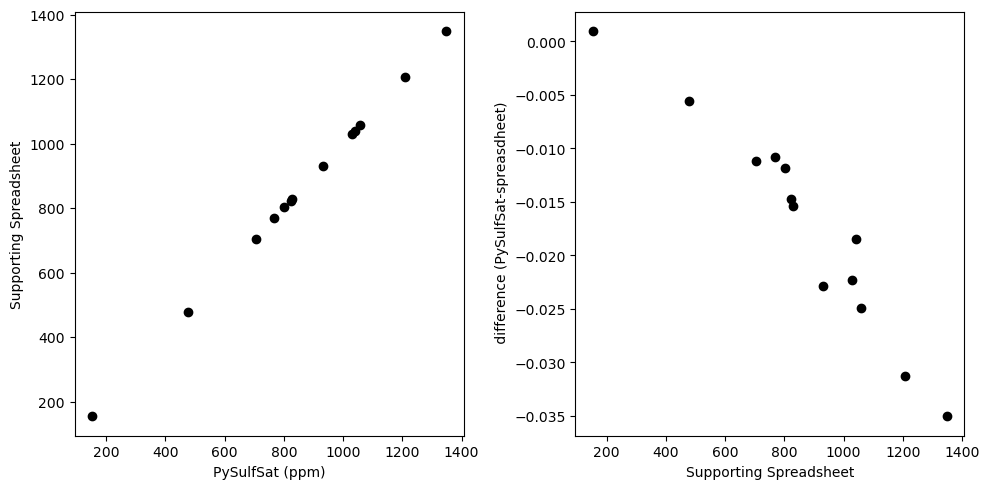

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(CalcS['SCSS_Tot'], Liq['S total cal'], 'ok')
ax2.plot(Liq['S total cal'],CalcS['SCSS_Tot']-Liq['S total cal'],  'ok')
ax1.set_xlabel('PySulfSat (ppm)')
ax1.set_ylabel('Supporting Spreadsheet')
ax2.set_ylabel(' difference (PySulfSat-spreasdheet)')
ax2.set_xlabel('Supporting Spreadsheet')
ax2.ticklabel_format(useOffset=False)
fig.tight_layout()

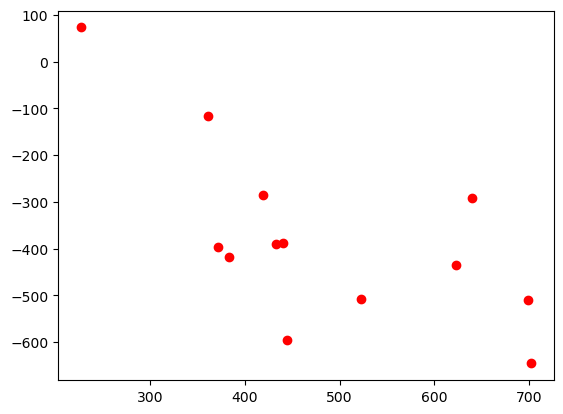

In [16]:
plt.plot(CalcS_Oneill['SCSS_Tot'], CalcS_Oneill['SCSS_Tot']-CalcS['SCSS_Tot'], 'or')